# Exercise 2: Working with Formation Tops Data
##### Read and Excel Workbook that has four worksheets:
- 1) Raw Data
- 2) FM Codes
- 3) Well Lookup Table
- 4) Attributes
##### Exercise Goals
###### In the Raw Data:
- 1) Convert WLBR_ID to a test string
- 2) Merge Easing and Northing from Well Data in Exercise 1
- 3) Merge the FM_Short column from the FM Codes worksheet
- 4) Get a count of FM_Short
- 5) Get a count of FM_Short by WLBR_ID

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# SET GLOBAL STYLE PARAMETERS
plt.style.use('ggplot') # This is a global setting
plt.rcParams["figure.figsize"]=6,4  #10 x 8 is default figure size in Jupyter Notebook

## Import CSV and Excel Workbooks (Two locations: local drive or Github)

In [2]:
# Read Data from Local Drive
# raw = pd.read_excel ('/Users/davidadvocate/Documents/Python/Data/sE2 Tops Exercise.xlsx',
#                     sheet_name='Raw Data')
# well = pd.read_csv('/Users/davidadvocate/Documents/Python/Data/sE1 Well Headers.csv')
# fms = pd.read_excel ('/Users/davidadvocate/Documents/Python/Data/sE2 Tops Exercise.xlsx',
#                     sheet_name='FM Codes')
#raw.info()
#well.info()

In [3]:
# Read CSV and XLSX files from Github

import requests
import io
from io import BytesIO

# Read CSV file
url = "https://raw.githubusercontent.com/dmadvoc/Petroleum-Geology-Analyses/main/sE1%20Well%20Headers.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
well = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Read sheets from XLSX file
# Note, You can not get the url path by clicking on "RAW" as with the CSV file, You'll have to know the sheet names
url2 = "https://raw.githubusercontent.com/dmadvoc/Petroleum-Geology-Analyses/main/sE2 Tops Exercise.xlsx"
download2 = requests.get(url2).content
raw = pd.read_excel(BytesIO(download2), sheet_name='Raw Data')
fms = pd.read_excel(BytesIO(download2), sheet_name='FM Codes')


## Examine imported Data

In [45]:
print('LIST OF VARIABLES: '),
print(raw.info())
# print(fms.info())
# print(well.info())

print('\n', 'BASIC STATS ON DATAFRAMES')
print(raw.describe())
# print(fms.describe())
# print(well.describe())

print('\n' ,'PRINT FIRST FEW LINES OF DATAFRAMES')
print(raw.head())
# print(fms.head())
# print(well.head())



LIST OF VARIABLES: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7285 entries, 0 to 7284
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WLBR_ID  7285 non-null   object 
 1   WLBR_NM  7285 non-null   object 
 2   FM       7285 non-null   object 
 3   TOP_MD   7285 non-null   float64
 4   LEN      7285 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 284.7+ KB
None

 BASIC STATS ON DATAFRAMES
            TOP_MD     LEN
count  7285.000000  7285.0
mean   1747.415525    12.0
std    1415.960404     0.0
min    -683.000000    12.0
25%     438.560000    12.0
50%    1669.820000    12.0
75%    2760.670000    12.0
max    6848.080000    12.0

 PRINT FIRST FEW LINES OF DATAFRAMES
        WLBR_ID WLBR_NM       FM   TOP_MD  LEN
0  490252206600    2-22    SHNNu   902.35   12
1  490252206600    2-22  SSXbase   541.44   12
2  490252206600    2-22     SSXS   488.36   12
3  490252206600    2-22    SHNNl  1005.26 

### Convert WLBR_ID from an integer to a string

In [4]:
raw['WLBR_ID'] = raw['WLBR_ID'].astype(str) # Convert WLBR_ID to a string
raw['LEN'] = raw['WLBR_ID'].str.len()       # Determine the WLBR_ID length, should be 12, like the well data
raw.describe()                              # Check min and max of LEN. Needs to be 12 characters for merging
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7285 entries, 0 to 7284
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WLBR_ID  7285 non-null   object 
 1   WLBR_NM  7285 non-null   object 
 2   FM       7285 non-null   object 
 3   TOP_MD   7285 non-null   float64
 4   LEN      7285 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 284.7+ KB


### Make WLBR_ID in well dataframe a string and check it's length (needs to be the same as raw tops data)

In [5]:
well['WLBR_ID'] = well['API Number'].astype(str)          # Create WLBR_ID as a string
well['LEN'] = well['WLBR_ID'].str.len()                   # Check that WLBR_ID is 12 characters long for merging
well = well[['WLBR_ID', 'Easting', 'Northing', 'LEN']]
well.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   WLBR_ID   1317 non-null   object 
 1   Easting   1317 non-null   float64
 2   Northing  1317 non-null   float64
 3   LEN       1317 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 41.3+ KB


### Merge Easting and Northing from Well Header data
This is a many to one relationship

In [6]:
raw_merged = pd.merge(raw, well, on='WLBR_ID', how='inner')
raw_merged

,WLBR_ID,WLBR_NM,FM,TOP_MD,LEN_x,Easting,Northing,LEN_y
0,490251022100,101-A-20,F2WC,2626.64,12,792036.7,975389.8,12
1,490251022100,101-A-20,F1WCbase,2237.94,12,792036.7,975389.8,12
2,490251022100,101-A-20,B1,2446.59,12,792036.7,975389.8,12
3,490251022100,101-A-20,F1WC,2210.40,12,792036.7,975389.8,12
4,490251040300,101-S-3,SHNNu,389.69,12,802615.8,960033.4,12
...,...,...,...,...,...,...,...,...
6681,490250639900,GOVT 1,NBRRws,2582.87,12,797225.2,956977.8,12
6682,490250639900,GOVT 1,NBRRsg,2818.89,12,797225.2,956977.8,12
6683,490250639900,GOVT 1,CRLL,3044.78,12,797225.2,956977.8,12
6684,490250639900,GOVT 1,F1WC,3310.05,12,797225.2,956977.8,12


### Merge Formation Short Names (FM_Short) to raw_megred
This is a many to one merge

In [7]:
#fms.info()
raw_merged = pd.merge(raw_merged, fms, on='FM', how='left' )
raw_merged = raw_merged[['WLBR_ID', 'WLBR_NM', 'TOP_MD', 'Easting', 'Northing', 'FM', 'FM_SHORT']]
raw_merged

,WLBR_ID,WLBR_NM,TOP_MD,Easting,Northing,FM,FM_SHORT
0,490251022100,101-A-20,2626.64,792036.7,975389.8,F2WC,Wall Creek
1,490251022100,101-A-20,2237.94,792036.7,975389.8,F1WCbase,Wall Creek
2,490251022100,101-A-20,2446.59,792036.7,975389.8,B1,Frontier
3,490251022100,101-A-20,2210.40,792036.7,975389.8,F1WC,Wall Creek
4,490251040300,101-S-3,389.69,802615.8,960033.4,SHNNu,Shannon
...,...,...,...,...,...,...,...
6681,490250639900,GOVT 1,2582.87,797225.2,956977.8,NBRRws,Niobrara
6682,490250639900,GOVT 1,2818.89,797225.2,956977.8,NBRRsg,Niobrara
6683,490250639900,GOVT 1,3044.78,797225.2,956977.8,CRLL,Carlisle
6684,490250639900,GOVT 1,3310.05,797225.2,956977.8,F1WC,Wall Creek


### Determine which stratigraphic horizons have the most top picks

      FM_SHORT  WLBR_ID  WLBR_NM  TOP_MD  Easting  Northing    FM
20     Shannon     2505     2505    2505     2505      2505  2505
27  Wall Creek     1705     1705    1705     1705      1705  1705
23      Sussex      615      615     615      615       615   615
21      Steele      398      398     398      398       398   398
17    Niobrara      377      377     377      377       377   377
9     Frontier      276      276     276      276       276   276
4     Carlisle      268      268     268      268       268   268
24    Tensleep      167      167     167      167       167   167


<AxesSubplot:ylabel='FM_SHORT'>

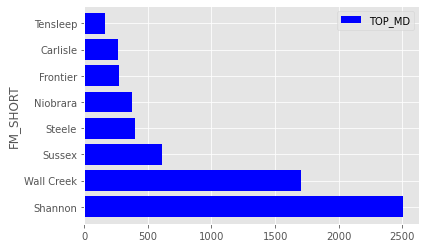

In [8]:
gb = raw_merged.groupby('FM_SHORT').count().reset_index('FM_SHORT')
gb.sort_values('TOP_MD', ascending=False, inplace=True)
gb=gb.loc[gb['TOP_MD'] >= 100]   
print(gb)
gb.plot.barh(x='FM_SHORT', y='TOP_MD', rot=0, color='blue', width=.8)


## Alternative method to get a count of FM

In [9]:
cnt = raw_merged['FM_SHORT'].value_counts()                      # Get a count of named variable
cnt = cnt.to_frame()                                             # Convert cnt to a DataFrame
cnt.reset_index(inplace=True)                                    # Convert the index to a DataFrame column
cnt = cnt.rename(columns = {'index':'FM', 'FM_SHORT': 'Count'})  # Rename the columns
pltdat=cnt.loc[cnt['Count'] >= 100]                              # Limit the plot data for >100 count
pltdat

,FM,Count
0,Shannon,2505
1,Wall Creek,1705
2,Sussex,615
3,Steele,398
4,Niobrara,377
5,Frontier,276
6,Carlisle,268
7,Tensleep,167


### Chart a bar chart show the most picked horizons

Text(0, 0.5, 'Frequency')

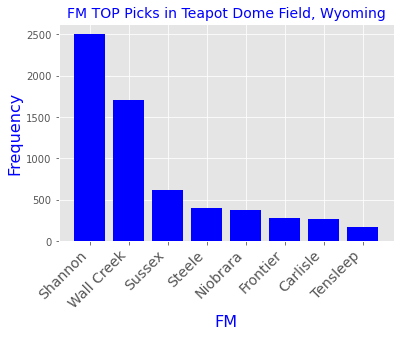

In [10]:
plt.bar(pltdat['FM'], pltdat['Count'], width=.8, color='b')
plt.title('FM TOP Picks in Teapot Dome Field, Wyoming', fontsize=14, color='blue')
plt.xlabel('FM', fontsize=16, color='blue')
plt.xticks(fontsize=14, rotation=45,horizontalalignment='right')
plt.ylabel('Frequency', fontsize=16, color="blue")

### Determine which subzones have the most stratigraphic top picks

In [17]:
cnt2 = raw_merged['FM'].value_counts()                            # Get a count of named variable
cnt2 = cnt2.to_frame()                                            # Convert cnt to a DataFrame
cnt2.reset_index(inplace=True)                                    # Convert the index to a DataFrame column
cnt2 = cnt2.rename(columns = {'index':'FM', 'FM': 'Count'})       # Rename the columns
cnt2                                                             # FM SHINN1 as the most picks

,FM,Count
0,SHNNl,920
1,SHNNu,916
2,SHNNbs,669
3,SSXbase,351
4,F1WCbase,332
5,F1WC,332
6,F2WC,324
7,F2WCbase,289
8,B1,276
9,CRLL,268


### Map Key Horizons

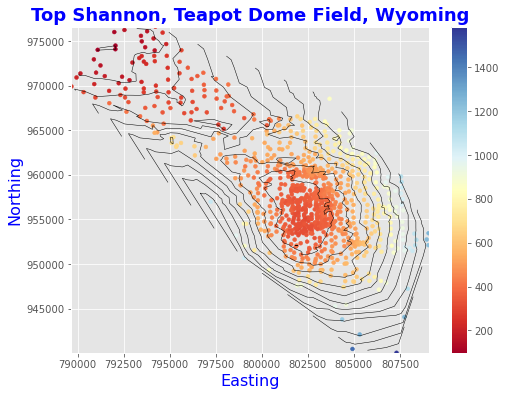

In [54]:
pltdat2 = raw_merged.loc[raw_merged['FM'] == 'SHNNl']
#pltdat2 = raw_merged.loc[raw_merged['FM_SHORT'] == 'Tensleep']

#cm = plt.cm.get_cmap('RdYlBu')

fig = plt.subplots(figsize=(8,6))
plt.tricontour(pltdat2['Easting'], pltdat2['Northing'], pltdat2['TOP_MD'], 15, linewidths=0.5, colors='k')
plt.scatter(pltdat2['Easting'], pltdat2['Northing'], c=pltdat2['TOP_MD'], label="SHINN1", s=15, cmap='RdYlBu')
plt.colorbar()
plt.title('Top Shannon, Teapot Dome Field, Wyoming', fontsize=18, fontweight='bold', color='blue')
plt.xlabel('Easting', fontsize=16, color='blue')
plt.ylabel('Northing', fontsize=16, color="blue")
plt.show()
